In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy 
import cv2

In [3]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train[0].shape)
x_train,x_test = x_train/255.0,x_test/255.0

11493376/11490434 [==============================] - 8s 1us/step
(28, 28)


In [4]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,verbose = 2 ,epochs = 25)
test_loss,test_accuracy = model.evaluate(x_test,y_test)

Epoch 1/25
1875/1875 - 4s - loss: 0.2296 - accuracy: 0.9320
Epoch 2/25
1875/1875 - 4s - loss: 0.0968 - accuracy: 0.9696
Epoch 3/25
1875/1875 - 4s - loss: 0.0673 - accuracy: 0.9782
Epoch 4/25
1875/1875 - 4s - loss: 0.0502 - accuracy: 0.9845
Epoch 5/25
1875/1875 - 4s - loss: 0.0399 - accuracy: 0.9868
Epoch 6/25
1875/1875 - 4s - loss: 0.0332 - accuracy: 0.9893
Epoch 7/25
1875/1875 - 4s - loss: 0.0277 - accuracy: 0.9907
Epoch 8/25
1875/1875 - 4s - loss: 0.0237 - accuracy: 0.9920
Epoch 9/25
1875/1875 - 4s - loss: 0.0190 - accuracy: 0.9935
Epoch 10/25
1875/1875 - 4s - loss: 0.0182 - accuracy: 0.9940
Epoch 11/25
1875/1875 - 4s - loss: 0.0159 - accuracy: 0.9949
Epoch 12/25
1875/1875 - 4s - loss: 0.0172 - accuracy: 0.9944
Epoch 13/25
1875/1875 - 4s - loss: 0.0153 - accuracy: 0.9951
Epoch 14/25
1875/1875 - 4s - loss: 0.0135 - accuracy: 0.9958
Epoch 15/25
1875/1875 - 4s - loss: 0.0134 - accuracy: 0.9957
Epoch 16/25
1875/1875 - 4s - loss: 0.0112 - accuracy: 0.9962
Epoch 17/25
1875/1875 - 4s - loss

In [29]:
model.save('modelnew')

INFO:tensorflow:Assets written to: modelnew\assets


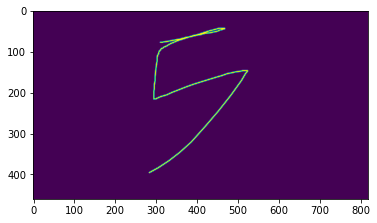

In [54]:
from tensorflow.keras.models import load_model
import cv2

model = load_model('modelnew')
img = cv2.imread('canvas.png',0)
img = cv2.bitwise_not(img)
plt.imshow(img)

In [58]:
img = cv2.resize(img,(28,28))
#img = numpy.expand_dims(img,axis = 0)
img = cv2.bitwise_not(img)

print(img.shape)

prediction = model.predict(img)
print(numpy.argmax(prediction))

(28, 28)


ValueError: in user code:

    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:372 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28]
